# Basic example of the GANN library

This example shows how to use the library to solve a classification problem.

COPYRIGHT (C) 2023 Gabriel Rojas (Gavit0) - turing.ia.ihc@gmail.com . All Rights Reserved.

## Installing

The following commands will install the python packages needed to use GANN and evaluate the results.

There are two options (choose just one):
* Install libraries in the environment. (Recomended)
* Using the local git repository

In [ ]:
# Option 1:
! pip install git+https://github.com/Turing-IA-IHC/gann.git

In [ ]:
# Option 2: Uncomment this lines and comment the previous line to use local version
#import sys
#sys.path.insert(0, "../../gann")

## GANN

In [1]:
#@title general imports
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import time

In [3]:
#@title gann imports
from gann.ga import Individual, Darwin_G0
from gann.nn import Net
from gann.nn.layers import Dense
from gann.nn.listeners import Keep_Progress, TwoDimensional_Graph

In [4]:
#@title Initial parameters
np.random.seed(42)
n = 500
clases = 2
X, Y = make_circles(n_samples=n, factor=0.4, noise=0.1)
Y = Y[:,np.newaxis]

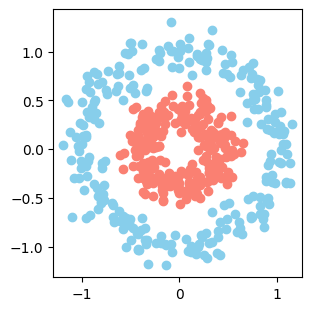

In [5]:
#@title Plot the data of test
fig, ax = plt.subplots(figsize=(3, 3), layout='constrained')
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c='salmon')
plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c='skyblue')
plt.axis('equal')
plt.show()

In [6]:
# Create a basic evolutive model
db = Darwin_G0(2, 1, X=X, Y=Y, limit_population=16, steps=500, listener=Keep_Progress())

In [7]:
# Create random population
db.population_create(4)

# Create and add some custom individuals
i1 = Net(loss_func='mse', layers=[Dense(8, 'Sigmoid'), Dense(4, 'Sigmoid'), Dense(1, 'Sigmoid')], listener=Keep_Progress())
i1.compile(clases)
db.population_add(Individual(i1))
i2 = Net(loss_func='mse', layers=[Dense(7, 'Sigmoid'), Dense(4, 'Sigmoid'), Dense(1, 'Sigmoid')], listener=Keep_Progress())
i2.compile(clases)
db.population_add(Individual(i2))
i3 = Net(loss_func='mse', layers=[Dense(8, 'Sigmoid'), Dense(3, 'Sigmoid'), Dense(1, 'Sigmoid')], listener=Keep_Progress())
i3.compile(clases)
db.population_add(Individual(i3))

# Show the population info
db.population_info()

 0) Adaptation:  0.0 => In: 2  -> [27, 72, 44, 86, 44, 35, 1] -> BinaryCrossEntropy: 0.0 | lr: 0.05
 1) Adaptation:  0.0 => In: 2  -> [90, 93, 53, 98, 16, 1] ->   MAE: 0.0 | lr: 0.01
 2) Adaptation:  0.0 => In: 2  -> [79, 108, 67, 71, 17, 1] -> BinaryCrossEntropy: 0.0 | lr: 0.01
 3) Adaptation:  0.0 => In: 2  -> [71, 55, 96, 41, 27, 98, 114, 59, 1] ->  RMSE: 0.0 | lr: 0.01
 4) Adaptation:  0.0 => In: 2  -> [8, 4, 1] ->   MSE: 0.0 | lr: 0.05
 5) Adaptation:  0.0 => In: 2  -> [7, 4, 1] ->   MSE: 0.0 | lr: 0.05
 6) Adaptation:  0.0 => In: 2  -> [8, 3, 1] ->   MSE: 0.0 | lr: 0.05


In [8]:
# Run the evolutive process
start_time = time.time()
db.start_evolution(7)
end_time = time.time()
print('Time evolving:', round(end_time - start_time, 2), 'seconds')

Start evolution...
		 ==== Gen:   0 Size:  7 ====


Training (MSE  :0.142): 100%|██████████| 500/500 [00:03<00:00, 144.47it/s]



 0) Adaptation:0.908 => In: 2  -> [8, 3, 1] ->   MSE: 0.14195 | lr: 0.05
 1) Adaptation:0.8599 => In: 2  -> [8, 4, 1] ->   MSE: 0.14009 | lr: 0.05
 2) Adaptation: 0.75 => In: 2  -> [7, 4, 1] ->   MSE: 0.24996 | lr: 0.05
 3) Adaptation:  0.5 => In: 2  -> [90, 93, 53, 98, 16, 1] ->   MAE: 0.5 | lr: 0.01
 4) Adaptation:0.2929 => In: 2  -> [71, 55, 96, 41, 27, 98, 114, 59, 1] ->  RMSE: 0.70711 | lr: 0.01
 5) Adaptation:-10.5129 => In: 2  -> [27, 72, 44, 86, 44, 35, 1] -> BinaryCrossEntropy: 11.51293 | lr: 0.05
 6) Adaptation:-10.5129 => In: 2  -> [79, 108, 67, 71, 17, 1] -> BinaryCrossEntropy: 11.51293 | lr: 0.01
		 ==== Gen:   1 Size: 16 ====


Training (MSE  :0.136): 100%|██████████| 500/500 [00:02<00:00, 191.10it/s]



 0) Adaptation:0.9739 => In: 2  -> [8, 3, 1] ->   MSE: 0.02613 | lr: 0.02391
 1) Adaptation:0.9739 => In: 2  -> [8, 3, 1] ->   MSE: 0.02613 | lr: 0.02391
 2) Adaptation:0.9739 => In: 2  -> [8, 3, 1] ->   MSE: 0.02613 | lr: 0.02391
 3) Adaptation:0.9481 => In: 2  -> [8, 3, 1] ->   MSE: 0.10194 | lr: 0.05
 4) Adaptation:0.9178 => In: 2  -> [8, 4, 1] ->   MSE: 0.08217 | lr: 0.05
 5) Adaptation:0.9178 => In: 2  -> [8, 4, 1] ->   MSE: 0.08217 | lr: 0.05
 6) Adaptation:0.8981 => In: 2  -> [8, 3, 1] ->   MSE: 0.10194 | lr: 0.05
 7) Adaptation:0.8981 => In: 2  -> [8, 3, 1] ->   MSE: 0.10194 | lr: 0.05
 8) Adaptation:0.8981 => In: 2  -> [8, 3, 1] ->   MSE: 0.10194 | lr: 0.05
 9) Adaptation:0.8981 => In: 2  -> [8, 3, 1] ->   MSE: 0.10194 | lr: 0.05
10) Adaptation:0.8981 => In: 2  -> [8, 3, 1] ->   MSE: 0.10194 | lr: 0.05
11) Adaptation:0.8981 => In: 2  -> [8, 3, 1] ->   MSE: 0.10194 | lr: 0.05
12) Adaptation:0.8981 => In: 2  -> [8, 3, 1] ->   MSE: 0.10194 | lr: 0.05
13) Adaptation:0.8981 => In:

Training (MSE  :0.016): 100%|██████████| 500/500 [00:02<00:00, 170.79it/s]



 0) Adaptation:0.9841 => In: 2  -> [8, 3, 1] ->   MSE: 0.0159 | lr: 0.01569
 1) Adaptation:0.9841 => In: 2  -> [8, 3, 1] ->   MSE: 0.0159 | lr: 0.01569
 2) Adaptation:0.9841 => In: 2  -> [8, 3, 1] ->   MSE: 0.0159 | lr: 0.01569
 3) Adaptation:0.9841 => In: 2  -> [8, 3, 1] ->   MSE: 0.0159 | lr: 0.01569
 4) Adaptation:0.9841 => In: 2  -> [8, 3, 1] ->   MSE: 0.0159 | lr: 0.01569
 5) Adaptation:0.9841 => In: 2  -> [8, 3, 1] ->   MSE: 0.0159 | lr: 0.01569
 6) Adaptation:0.9841 => In: 2  -> [8, 3, 1] ->   MSE: 0.0159 | lr: 0.01569
 7) Adaptation:0.9841 => In: 2  -> [8, 3, 1] ->   MSE: 0.0159 | lr: 0.01569
 8) Adaptation:0.9841 => In: 2  -> [8, 3, 1] ->   MSE: 0.0159 | lr: 0.01569
 9) Adaptation:0.9841 => In: 2  -> [8, 3, 1] ->   MSE: 0.0159 | lr: 0.01569
10) Adaptation:0.9841 => In: 2  -> [8, 3, 1] ->   MSE: 0.0159 | lr: 0.01569
11) Adaptation:0.9841 => In: 2  -> [8, 3, 1] ->   MSE: 0.0159 | lr: 0.01569
12) Adaptation:0.9841 => In: 2  -> [8, 3, 1] ->   MSE: 0.0159 | lr: 0.01569
13) Adaptat

Training (MSE  :0.012): 100%|██████████| 500/500 [00:03<00:00, 165.79it/s]



 0) Adaptation:1.038 => In: 2  -> [8, 3, 1] ->   MSE: 0.01198 | lr: 0.01181
 1) Adaptation:0.988 => In: 2  -> [8, 3, 1] ->   MSE: 0.01199 | lr: 0.01144
 2) Adaptation:0.988 => In: 2  -> [8, 3, 1] ->   MSE: 0.01199 | lr: 0.01144
 3) Adaptation:0.988 => In: 2  -> [8, 3, 1] ->   MSE: 0.01199 | lr: 0.01144
 4) Adaptation:0.988 => In: 2  -> [8, 3, 1] ->   MSE: 0.01199 | lr: 0.01144
 5) Adaptation:0.988 => In: 2  -> [8, 3, 1] ->   MSE: 0.01199 | lr: 0.01144
 6) Adaptation:0.988 => In: 2  -> [8, 3, 1] ->   MSE: 0.01199 | lr: 0.01144
 7) Adaptation:0.988 => In: 2  -> [8, 3, 1] ->   MSE: 0.01199 | lr: 0.01144
 8) Adaptation:0.988 => In: 2  -> [8, 3, 1] ->   MSE: 0.01199 | lr: 0.01144
 9) Adaptation:0.988 => In: 2  -> [8, 3, 1] ->   MSE: 0.01199 | lr: 0.01144
10) Adaptation:0.988 => In: 2  -> [8, 3, 1] ->   MSE: 0.01199 | lr: 0.01144
11) Adaptation:0.988 => In: 2  -> [8, 3, 1] ->   MSE: 0.01199 | lr: 0.01144
12) Adaptation:0.988 => In: 2  -> [8, 3, 1] ->   MSE: 0.01199 | lr: 0.01144
13) Adaptat

Training (MSE  : 0.01): 100%|██████████| 500/500 [00:03<00:00, 157.77it/s]


 ******** Objetive reached ******** 

 0) Adaptation:1.0402 => In: 2  -> [8, 3, 1] ->   MSE: 0.00983 | lr: 0.00886
 1) Adaptation:0.9901 => In: 2  -> [8, 3, 1] ->   MSE: 0.00989 | lr: 0.00927
 2) Adaptation:0.9901 => In: 2  -> [8, 3, 1] ->   MSE: 0.00989 | lr: 0.00927
 3) Adaptation:0.9901 => In: 2  -> [8, 3, 1] ->   MSE: 0.00989 | lr: 0.00927
 4) Adaptation:0.9901 => In: 2  -> [8, 3, 1] ->   MSE: 0.00989 | lr: 0.00957
 5) Adaptation:0.9901 => In: 2  -> [8, 3, 1] ->   MSE: 0.00989 | lr: 0.00957
 6) Adaptation:0.9901 => In: 2  -> [8, 3, 1] ->   MSE: 0.00989 | lr: 0.00957
 7) Adaptation:0.9901 => In: 2  -> [8, 3, 1] ->   MSE: 0.00989 | lr: 0.00957
 8) Adaptation:0.9901 => In: 2  -> [8, 3, 1] ->   MSE: 0.00989 | lr: 0.00957
 9) Adaptation:0.9901 => In: 2  -> [8, 3, 1] ->   MSE: 0.00989 | lr: 0.00957
10) Adaptation:0.9901 => In: 2  -> [8, 3, 1] ->   MSE: 0.00989 | lr: 0.00957
11) Adaptation:0.9901 => In: 2  -> [8, 3, 1] ->   MSE: 0.00989 | lr: 0.00957
12) Adaptation:0.9901 => In: 2  -> [8

Best model adapted: 1.04
Inputs: 2    Outputs: 1    lr: 0.00886293811965251  loss (MSE): 0.01   Params: 46

 Layer : Type     | in  : out : Act func  : Params
   0   : Dense    |  2  :  8  : Sigmoid   : 17        
   1   : Dense    |  8  :  3  : Sigmoid   : 25        
   2   : Dense    |  3  :  1  : Sigmoid   : 4         



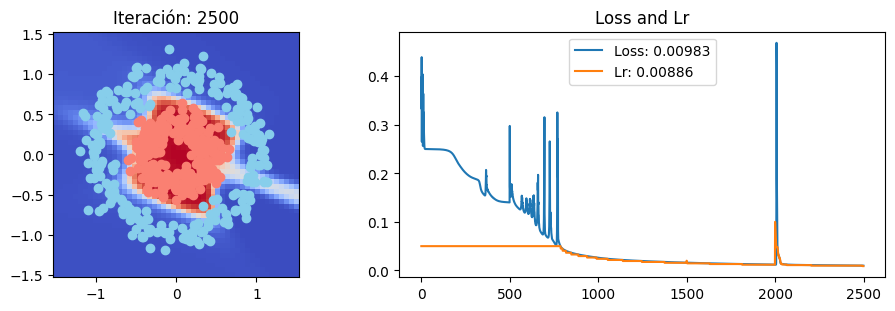

In [9]:
# Show the best model
db.population_sort()
best_model = db.population[0].ADN
print('Best model adapted:', round(db.population[0].adaptation, 3))
best_model.info()
tdg = TwoDimensional_Graph(X,Y, best_model)
for i in zip(best_model.listener.losses, best_model.listener.lrs):
  tdg.append_data(i[0], i[1])
tdg.show()